<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_1893/NGC_1893_version_2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [2]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [3]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 3.7MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 2.6MB 45.4MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831874 sha256=5ebea91fb8a36c0e1393d03b1dab86e5fca2af51774ea401949ef62d97675a72
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [4]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [5]:
## making a GAIA cone_search of 30m radius around NGC1893 center

coordinate = coord.SkyCoord.from_name('NGC1893')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (80.68333333, 33.41166667)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [6]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 181173647673361280,181173647673361280,1483864201,2015.5,80.684603,0.033843,33.412081,0.025595,0.353639,0.036231,9.760555,0.137340,0.065628,-1.251084,0.043157,-0.404071,0.126200,-0.415880,0.464060,-0.331484,0.289410,-0.543771,0.352913,0.232732,-0.329534,142,0,142,0,0.819498,150.307465,0.000000,0.000000,31,False,82.927475,1.677050,0.007350,-0.170126,...,40087.897710,88.817455,451.351562,13.254387,1.216119,0,0.474896,0.147382,0.327515,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585244,-1.679365,82.108439,10.227637,100001,7270.930176,7098.100098,7807.00000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.939201,2.549417,3.084076,21.752707,16.569754,26.935659,https://gea.esac.esa.int/data-server/datalink/...,,0.001133
1,1635721458409799680,Gaia DR2 181173647670255232,181173647670255232,694905700,2015.5,80.685344,0.317080,33.410823,0.253937,-0.136818,0.395804,-0.345672,1.221537,0.727228,-1.041465,0.503148,-0.313737,0.232041,0.194107,0.056717,-0.537575,0.002978,-0.240740,0.063160,0.401163,-0.475289,142,0,141,1,1.439612,160.405792,0.000000,0.006779,31,False,0.249249,1.534035,0.072411,-0.180904,...,546.698549,21.273059,25.699104,17.917551,1.915866,0,1.102009,-0.004078,1.106087,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.586632,-1.679567,82.108983,10.226341,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001870
2,1635721458409799680,Gaia DR2 181173643375562240,181173643375562240,751395326,2015.5,80.682794,0.280308,33.414174,0.230233,0.476046,0.359589,1.323862,-2.477787,0.608541,-0.443799,0.435851,-0.314617,0.331319,0.186329,0.131048,-0.560377,-0.047011,-0.207994,0.190062,0.359596,-0.403558,143,0,143,0,0.208735,140.820099,0.000000,0.000000,31,False,0.309160,1.443662,0.064041,-0.131571,...,806.455459,9.672464,83.376427,17.495468,2.004344,0,1.870014,0.479704,1.390310,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.582663,-1.679426,82.107047,10.229824,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002554
3,1635721458409799680,Gaia DR2 181173647670249088,181173647670249088,484695233,2015.5,80.682736,0.260291,33.414937,0.213979,0.567555,0.327464,1.733185,0.489020,0.535777,-2.092622,0.383637,-0.336726,0.304620,0.056802,0.243668,-0.532871,0.045078,-0.304211,0.221608,0.356029,-0.351383,147,0,147,0,2.146245,180.543427,0.678741,1.620727,31,False,0.349386,1.386778,0.058317,-0.127316,...,875.127187,14.162034,61.793892,17.406742,1.738860,0,1.806957,0.586079,1.220879,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.582006,-1.679034,82.107049,10.230589,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa

In [7]:
all_stars[all_stars['parallax_over_error'] > 5]

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 181173647673361280,181173647673361280,1483864201,2015.5,80.684603,0.033843,33.412081,0.025595,0.353639,0.036231,9.760555,0.137340,0.065628,-1.251084,0.043157,-0.404071,0.126200,-0.415880,0.464060,-0.331484,0.289410,-0.543771,0.352913,0.232732,-0.329534,142,0,142,0,0.819498,150.307465,0.000000,0.000000e+00,31,False,82.927475,1.677050,0.007350,-0.170126,...,40087.897710,88.817455,451.351562,13.254387,1.216119,0,0.474896,0.147382,0.327515,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585244,-1.679365,82.108439,10.227637,100001,7270.930176,7098.100098,7807.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.939201,2.549417,3.084076,21.752707,16.569754,26.935659,https://gea.esac.esa.int/data-server/datalink/...,,0.001133
23,1635721458409799680,Gaia DR2 181174403587604224,181174403587604224,1269934252,2015.5,80.679222,0.027111,33.418166,0.021730,0.312039,0.032525,9.593742,-0.268702,0.049882,-1.387273,0.035424,-0.246148,0.266331,-0.228977,0.354428,-0.449093,0.136382,-0.492036,0.280176,0.374393,-0.087387,160,0,160,0,-4.178366,91.986031,0.000000,0.000000e+00,31,False,123.804367,1.541493,0.006539,-0.101404,...,79607.276998,658.374611,120.914864,12.509538,1.268399,0,1.155943,0.477227,0.678716,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.577683,-1.679625,82.104290,10.234003,100001,4899.190430,4818.000000,4986.669922,NaN,NaN,NaN,NaN,NaN,NaN,200111,9.398450,9.071594,9.717874,45.846313,34.468830,57.223797,https://gea.esac.esa.int/data-server/datalink/...,,0.007357
33,1635721458409799680,Gaia DR2 181174025630479360,181174025630479360,29884937,2015.5,80.692027,0.047236,33.416048,0.032241,0.352295,0.064405,5.470024,-0.247113,0.068936,-1.468851,0.051523,-0.507853,0.646235,0.146307,0.535540,-0.635479,-0.073588,-0.601952,0.417870,0.597423,0.043620,131,0,129,2,-3.345325,77.936180,0.000000,0.000000e+00,31,False,65.744781,1.676015,0.009007,-0.171690,...,33129.550876,188.743789,175.526581,13.461381,1.230588,0,0.590916,0.191039,0.399877,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585480,-1.672010,82.114987,10.231190,100001,6852.666504,6480.000000,7243.500000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008474
62,1635721458409799680,Gaia DR2 181174403587607552,181174403587607552,76012136,2015.5,80.669911,0.068981,33.412437,0.053916,0.681237,0.086052,7.916603,3.789416,0.107974,-5.475620,0.080778,-0.509334,0.493135,-0.058985,0.538510,-0.588366,0.112765,-0.561702,0.325116,0.521347,-0.103298,127,0,127,0,-0.413653,115.009796,0.000000,0.000000e+00,31,False,10.793571,1.560603,0.014333,-0.186512,...,7041.979826,19.445226,362.144409,15.142683,1.245897,0,1.006348,0.405218,0.601130,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.578008

In [8]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 5]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


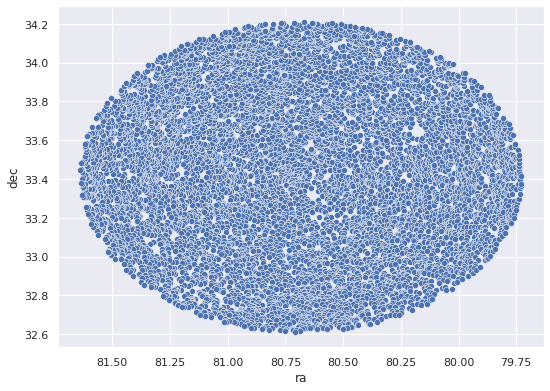

In [9]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()

#### Finding Cantat Data

In [10]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [11]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [12]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [13]:
# help(Vizier)

In [31]:
## saving only NGC 1893 data from Cantat

cantat_1893 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_1893")
cantat_1893 = cantat_1893[0].to_pandas()
cantat_1893

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,81.149455,33.284768,182470723501404800,0.3615,0.117,-0.714,NaN,17.414000,1.2091,0.1,NGC_1893,81.149455,33.284771
1,81.119439,33.363766,182472308346167936,0.2641,-0.608,-0.591,39.269804,13.264800,1.9393,0.1,NGC_1893,81.119442,33.363768
2,81.131238,33.508885,182486842515427840,0.1172,0.070,-0.804,NaN,16.060801,1.9589,0.2,NGC_1893,81.131237,33.508888
3,81.006873,33.548464,182490690806147712,0.2768,-0.094,-1.682,NaN,14.954500,1.8016,0.8,NGC_1893,81.006874,33.548471
4,81.122228,33.440556,182485949162263680,0.2378,0.316,-1.816,NaN,17.271099,1.3154,0.3,NGC_1893,81.122226,33.440563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,80.738744,33.441257,181174128709666304,0.3098,-0.185,-1.245,NaN,14.454100,0.5358,0.9,NGC_1893,80.738745,33.441263
490,80.759437,33.527037,181177044990761088,0.3628,-0.031,-0.890,NaN,11.109000,0.3429,0.5,NGC_1893,80.759438,33.527041
491,80.486479,33.742721,181197695194288640,0.3737,0.487,-1.105,NaN,17.628500,1.3684,0.1,NGC_1893,80.486477,33.742726
492,80.688044,33.406547,181173643374509824,0.3148,-0.548,-1.372,NaN,12.207800,0.4295,0.6,NGC_1893,80.688047,33.406553


In [32]:
# renaming the cantat table to match it with gaia_data
cantat_1893 = cantat_1893.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [33]:
# taking the subset of only source_id and PMemb
cantat_1893 = cantat_1893.loc[:,['source_id', 'PMemb']]


In [34]:
cantat_1893.isnull().sum()

source_id    0
PMemb        0
dtype: int64

In [35]:
# join the two table on source_id
cantat_1893 = all_stars_filtered.join(cantat_1893.set_index('source_id'), on='source_id')

In [36]:
cantat_1893.isnull().sum()

solution_id                 0
designation                 0
source_id                   0
random_index                0
ref_epoch                   0
                        ...  
lum_percentile_upper     4188
datalink_url                0
epoch_photometry_url        0
dist                        0
PMemb                   10256
Length: 98, dtype: int64

In [37]:
cantat_1893.shape

(10355, 98)

In [38]:
cantat_1893.dropna(subset=['PMemb']).shape

(99, 98)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


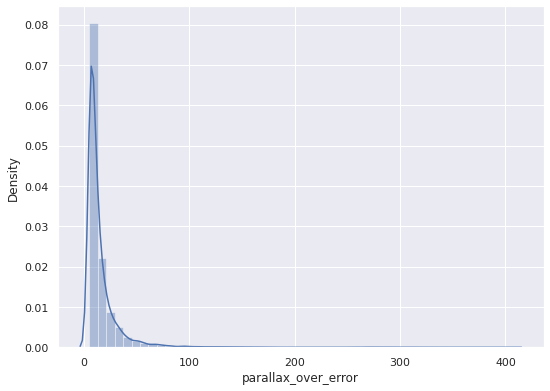

In [39]:
sns.distplot(cantat_1893.parallax_over_error)

In [40]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_1893 = cantat_1893.dropna(subset=['PMemb'])
cantat_1893

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
0,1635721458409799680,Gaia DR2 181173647673361280,181173647673361280,1483864201,2015.5,80.684603,0.033843,33.412081,0.025595,0.353639,0.036231,9.760555,0.137340,0.065628,-1.251084,0.043157,-0.404071,0.126200,-0.415880,0.464060,-0.331484,0.289410,-0.543771,0.352913,0.232732,-0.329534,142,0,142,0,0.819498,150.307465,0.000000,0.000000,31,False,82.927475,1.677050,0.007350,-0.170126,...,88.817455,451.351562,13.254387,1.216119,0,0.474896,0.147382,0.327515,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585244,-1.679365,82.108439,10.227637,100001,7270.930176,7098.100098,7807.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.939201,2.549417,3.084076,21.752707,16.569754,26.935659,https://gea.esac.esa.int/data-server/datalink/...,,0.001133,0.6
23,1635721458409799680,Gaia DR2 181174403587604224,181174403587604224,1269934252,2015.5,80.679222,0.027111,33.418166,0.021730,0.312039,0.032525,9.593742,-0.268702,0.049882,-1.387273,0.035424,-0.246148,0.266331,-0.228977,0.354428,-0.449093,0.136382,-0.492036,0.280176,0.374393,-0.087387,160,0,160,0,-4.178366,91.986031,0.000000,0.000000,31,False,123.804367,1.541493,0.006539,-0.101404,...,658.374611,120.914864,12.509538,1.268399,0,1.155943,0.477227,0.678716,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.577683,-1.679625,82.104290,10.234003,100001,4899.190430,4818.000000,4986.669922,NaN,NaN,NaN,NaN,NaN,NaN,200111,9.398450,9.071594,9.717874,45.846313,34.468830,57.223797,https://gea.esac.esa.int/data-server/datalink/...,,0.007357,1.0
33,1635721458409799680,Gaia DR2 181174025630479360,181174025630479360,29884937,2015.5,80.692027,0.047236,33.416048,0.032241,0.352295,0.064405,5.470024,-0.247113,0.068936,-1.468851,0.051523,-0.507853,0.646235,0.146307,0.535540,-0.635479,-0.073588,-0.601952,0.417870,0.597423,0.043620,131,0,129,2,-3.345325,77.936180,0.000000,0.000000,31,False,65.744781,1.676015,0.009007,-0.171690,...,188.743789,175.526581,13.461381,1.230588,0,0.590916,0.191039,0.399877,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585480,-1.672010,82.114987,10.231190,100001,6852.666504,6480.000000,7243.500000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008474,1.0
73,1635721458409799680,Gaia DR2 181173578953884928,181173578953884928,644466528,2015.5,80.694178,0.032708,33.403604,0.026391,0.243681,0.039949,6.099824,-0.282915,0.059370,-1.502633,0.042442,-0.282469,0.285888,-0.205000,0.379250,-0.481303,0.133841,-0.498318,0.285470,0.390419,-0.095825,159,0,158,1,-2.801394,108.510246,0.000000,0.000000,31,False,48.302460,1.603814,0.007923,-0.109446,...,47.850864,573.585571,13.665700,1.230268,0,0.862517,0.335684,0.526834,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.596761,-1.677571,82.115980,10.218656,100001,5599.800293,5400.000000,583

In [41]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_1893.to_csv('NGC_1893_cantat.csv')
# all_stars.to_csv('NGC_1893_Gaia_30m.csv')

In [42]:
cantat_1893.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,9.900000e+01,9.900000e+01,9.900000e+01,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,2.000000,2.000000,99.000000,2.000000,2.000000,2.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,99.000000,99.000000
mean,1.635721e+18,1.814353e+17,9.075314e+08,2015.5,80.747500,0.041009,33.443558,0.033017,0.305433,0.045916,6.859566,-0.188615,0.078698,-1.361384,0.055612,-0.178605,0.164131,-0.252330,0.272117,-0.377863,0.171102,-0.511712,0.155069,0.337855,-0.085752,148.959596,14.121212,148.181818,0.777778,-0.092885,147.444580,0.011407,0.218452,31.0,64.366661,1.575603,0.008952,-0.097976,16.909091,10.303030,...,14.713500,15.444444,5.715839e+04,140.445390,518.559692,13.713282,1.255542,0.060606,1.000219,0.418706,0.581513,18.699157,0.960644,0.080808,5750.000000,4.000000,0.0,173.588825,-1.618222,82.163728,10.255735,100021.262626,5715.146484,5501.211426,6110.693359,1.306397,1.058595,1.661015,0.650430,0.523787,0.832880,200111.0,7.435204,6.378483,8.135204,72.355545,54.608334,90.102730,0.188763,0.583838
std,0.000000e+00,6.053841e+14,5.240856e+08,0.0,0.194423,0.011133,0.149213,0.008420,0.052536,0.010143,1.501217,0.369778,0.020132,0.324076,0.014273,0.204680,0.125329,0.147170,0.161773,0.096562,0.151524,0.117939,0.119745,0.102719,0.190105,19.880726,41.395621,19.697386,1.191428,3.065744,69.150284,0.034628,0.871172,0.0,76.476768,0.092966,0.002125,0.077592,2.213552,0.734771,...,1.302472,2.843619,1.397741e+05,381.853021,478.822937,1.149414,0.050021,0.239821,0.483202,0.268190,0.217620,29.091288,0.217557,0.633693,353.553406,0.707107,0.0,0.140135,0.170210,0.166565,0.147400,201.001553,1182.209351,1145.896973,1190.838257,0.372275,0.363229,0.425162,0.185375,0.175645,0.220638,0.0,5.044431,4.305860,5.516739,129.711990,98.694420,160.921799,0.128555,0.344552
min,1.635721e+18,1.809519e+17,6.862069e+06,2015.5,80.190774,0.025518,33.063148,0.020848,0.205932,0.027534,5.014656,-1.120928,0.049882,-2.314877,0.035424,-0.756741,-0.100532,-0.656294,-0.131934,-0.638753,-0.169092,-0.772315,-0.130885,0.014066,-0.571239,88.000000,0.000000,87.000000,0.000000,-5.626834,65.433289,0.000000,0.000000,31.0,6.368932,1.351176,0.005114,-

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


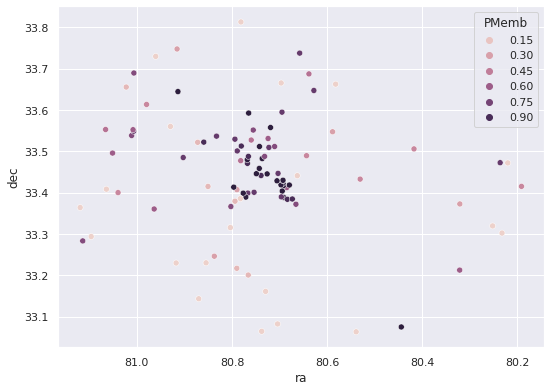

In [43]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_1893['ra'], cantat_1893['dec'], hue = cantat_1893['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [44]:
# import member dataset
member = cantat_1893.copy()

In [45]:
### adding their distance from the center of the clusters

## NGC 1893
center = coord.SkyCoord.from_name('NGC1893')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_1893_center'] = distance

In [46]:
member['PMemb'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb,dist_1893_center
0,1635721458409799680,Gaia DR2 181173647673361280,181173647673361280,1483864201,2015.5,80.684603,0.033843,33.412081,0.025595,0.353639,0.036231,9.760555,0.137340,0.065628,-1.251084,0.043157,-0.404071,0.126200,-0.415880,0.464060,-0.331484,0.289410,-0.543771,0.352913,0.232732,-0.329534,142,0,142,0,0.819498,150.307465,0.0,0.0,31,False,82.927475,1.677050,0.007350,-0.170126,...,451.351562,13.254387,1.216119,0,0.474896,0.147382,0.327515,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585244,-1.679365,82.108439,10.227637,100001,7270.930176,7098.100098,7807.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.939201,2.549417,3.084076,21.752707,16.569754,26.935659,https://gea.esac.esa.int/data-server/datalink/...,,0.001133,1,0.001138
23,1635721458409799680,Gaia DR2 181174403587604224,181174403587604224,1269934252,2015.5,80.679222,0.027111,33.418166,0.021730,0.312039,0.032525,9.593742,-0.268702,0.049882,-1.387273,0.035424,-0.246148,0.266331,-0.228977,0.354428,-0.449093,0.136382,-0.492036,0.280176,0.374393,-0.087387,160,0,160,0,-4.178366,91.986031,0.0,0.0,31,False,123.804367,1.541493,0.006539,-0.101404,...,120.914864,12.509538,1.268399,0,1.155943,0.477227,0.678716,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.577683,-1.679625,82.104290,10.234003,100001,4899.190430,4818.000000,4986.669922,NaN,NaN,NaN,NaN,NaN,NaN,200111,9.398450,9.071594,9.717874,45.846313,34.468830,57.223797,https://gea.esac.esa.int/data-server/datalink/...,,0.007357,1,0.007349
33,1635721458409799680,Gaia DR2 181174025630479360,181174025630479360,29884937,2015.5,80.692027,0.047236,33.416048,0.032241,0.352295,0.064405,5.470024,-0.247113,0.068936,-1.468851,0.051523,-0.507853,0.646235,0.146307,0.535540,-0.635479,-0.073588,-0.601952,0.417870,0.597423,0.043620,131,0,129,2,-3.345325,77.936180,0.0,0.0,31,False,65.744781,1.676015,0.009007,-0.171690,...,175.526581,13.461381,1.230588,0,0.590916,0.191039,0.399877,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585480,-1.672010,82.114987,10.231190,100001,6852.666504,6480.000000,7243.500000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008474,1,0.008477
73,1635721458409799680,Gaia DR2 181173578953884928,181173578953884928,644466528,2015.5,80.694178,0.032708,33.403604,0.026391,0.243681,0.039949,6.099824,-0.282915,0.059370,-1.502633,0.042442,-0.282469,0.285888,-0.205000,0.379250,-0.481303,0.133841,-0.498318,0.285470,0.390419,-0.095825,159,0,158,1,-2.801394,108.510246,0.0,0.0,31,False,48.302460,1.603814,0.007923,-0.109446,...,573.585571,13.665700,1.230268,0,0.862517,0.335684,0.526834,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.596761,-1.677571,82.115980,10.218656,100001,5599.800293,5400.000000,5833.333496,1.985,1.7300,2.2835,1.001,0.8580,1.1168,<NA>,NaN,NaN,NaN,Na

In [47]:
### adding their distance from the center of the clusters

## NGC 1893
center = coord.SkyCoord.from_name('NGC1893')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_1893_center'] = distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


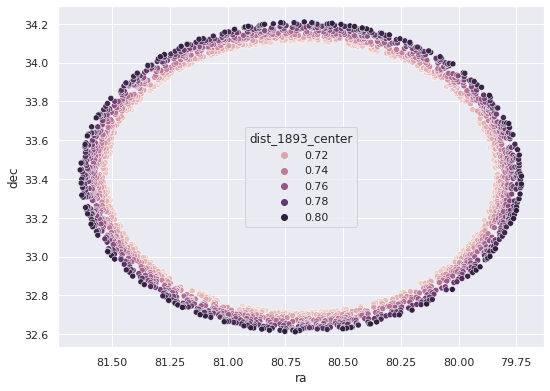

In [48]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_1893_center', 
                          data = all_stars_filtered[all_stars_filtered.dist_1893_center >= 0.7])
skyplot.invert_xaxis()

In [49]:
non_member = all_stars_filtered[all_stars_filtered['dist_1893_center'] >= 0.7].sample(len(member))

In [50]:
non_member['PMemb'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_1893_center,PMemb
70392,1635721458409799680,Gaia DR2 181256557721768064,181256557721768064,48536664,2015.5,80.066654,0.044125,33.926195,0.030450,0.296684,0.044156,6.718933,1.885782,0.068248,-1.739706,0.047168,-0.487621,0.411538,-0.372468,0.501959,-0.370967,0.313925,-0.661722,0.153686,0.339379,-0.127827,141,0,141,0,-0.978446,119.878952,0.000000,0.000000,31,False,51.874966,1.462827,0.006913,-0.166111,...,772.505493,13.257991,1.302791,1,1.651969,0.784754,0.867215,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,172.869597,-1.810230,81.621953,10.775357,100002,4184.250000,3984.000000,4387.560059,0.9493,0.8320,1.1730,0.4557,0.4020,0.5685,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.726743,0.725651,0
74211,1635721458409799680,Gaia DR2 180940241971236096,180940241971236096,1175054261,2015.5,80.260264,0.060909,32.754773,0.050885,0.589293,0.078356,7.520703,-1.494201,0.123935,-3.938147,0.086722,-0.209323,0.107984,-0.054383,0.172533,-0.542041,0.161371,-0.481655,-0.028568,0.500735,-0.249189,142,0,141,1,0.604844,145.522659,0.112227,0.667772,31,True,7.476504,1.518075,0.015533,-0.178859,...,459.384613,15.323728,1.265670,0,1.256310,0.543629,0.712682,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.924952,-2.345100,81.703718,9.595563,100001,4831.919922,4689.873535,5010.120117,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.390194,1.293060,1.475682,0.949128,0.685232,1.213024,https://gea.esac.esa.int/data-server/datalink/...,,0.746432,0.747062,0
72033,1635721458409799680,Gaia DR2 182757219295738880,182757219295738880,958504820,2015.5,80.747524,0.028979,34.144894,0.025059,0.739590,0.032458,22.785866,1.086913,0.060056,-4.769542,0.045303,0.006435,0.099581,-0.297735,0.097866,-0.379607,0.021039,-0.473725,0.164046,0.316717,-0.018679,153,0,153,0,1.244794,169.734375,0.000000,0.000000,31,False,39.828999,1.594623,0.006599,0.013972,...,717.507568,13.854832,1.221402,0,0.907303,0.368958,0.538345,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.010358,-1.221687,82.210203,10.955472,100001,5428.333496,5138.160156,5828.332520,1.3100,0.8909,1.5361,0.6100,0.4063,0.7660,200111,1.770679,1.535975,1.976322,2.452678,2.196295,2.709061,https://gea.esac.esa.int/data-server/datalink/...,,0.735170,0.735149,0
77954,1635721458409799680,Gaia DR2 182430595624140288,182430595624140288,435692130,2015.5,81.599171,0.060320,33.459360,0.049602,0.636569,0.059891,10.628738,5.595573,0.115683,-7.063701,0.081115,-0.229823,-0.031418,-0.445418,0.346053,-0.307897,0.291667,-0.521070,0.218579,0.221268,-0.131442,166,0,165,1,0.353264,165.719543,0.000000,0.000000,31,False,6.896224,1.527823,0.013568,-0.046109,...,453.904266,15.521764,1.251090,0,1.172568,0.502609,0.669959,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.975281,-1.021581,82.885457,10.227321,100001,4890.000000,4800.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


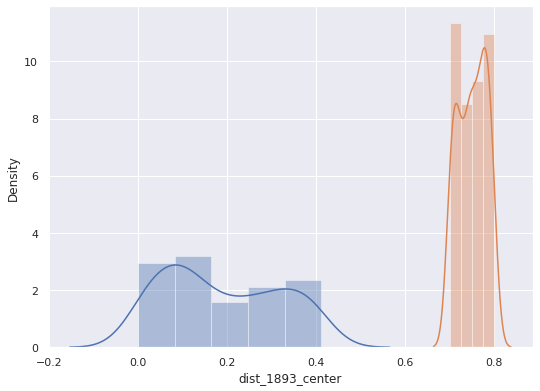

In [51]:
sns.distplot(member['dist_1893_center'])
sns.distplot(non_member['dist_1893_center'])

In [52]:
training_data = pd.concat([member, non_member])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


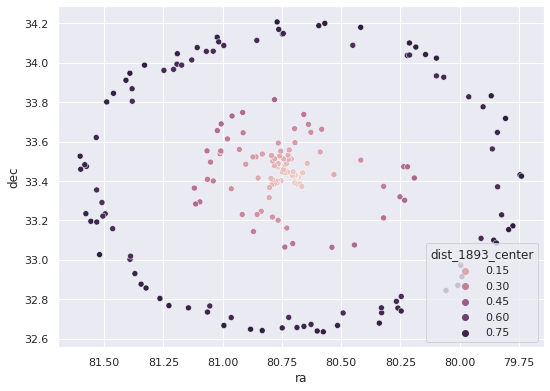

In [53]:
skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_1893_center', 
                          data = training_data)
skyplot.invert_xaxis()

In [54]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_1893_center
count,1.980000e+02,1.980000e+02,1.980000e+02,198.0,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,1.980000e+02,198.0,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,1.970000e+02,197.000000,197.000000,197.000000,197.000000,198.000000,197.000000,197.000000,197.000000,7.000000,7.000000,198.000000,7.000000,7.000000,7.0,198.000000,198.000000,198.000000,198.000000,180.000000,180.000000,180.000000,180.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,92.0,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,198.000000,198.000000,198.000000
mean,1.635721e+18,1.815846e+17,8.983992e+08,2015.5,80.744751,0.062216,33.424842,0.050142,0.798731,0.070636,12.822490,1.275047,0.128040,-2.956534,0.090939,-0.164824,0.140375,-0.229597,0.243295,-0.361852,0.174469,-0.481487,0.121287,0.336841,-0.121043,151.595960,14.106061,150.772727,0.823232,1.109102,272.240509,0.086124,5.323322e+00,31.0,55.010921,1.543562,0.013537,-0.089368,17.267677,10.328283,...,15.606061,4.825799e+04,105.962172,479.356689,14.229754,1.277669,0.085859,1.173665,0.511716,0.661949,15.096158,2.153755,0.141414,5214.285645,3.500000,0.0,173.602415,-1.630330,82.160181,10.237682,100023.305556,5417.206543,5215.272461,5757.490723,1.016140,0.789250,1.329449,0.505392,0.392488,0.667277,200111.0,4.066054,3.574295,4.409052,30.402147,23.254402,37.549854,0.469577,0.500000,0.469568
std,0.000000e+00,7.140836e+14,4.941409e+08,0.0,0.448607,0.076929,0.408107,0.062656,1.274681,0.091449,20.235516,3.667381,0.167175,8.212307,0.117823,0.188014,0.147101,0.176970,0.189355,0.104063,0.140083,0.123879,0.164329,0.115578,0.203425,18.798379,42.912659,18.620001,1.397629,9.049678,1264.774780,0.394349,5.161026e+01,0.0,86.225067,0.106519,0.015851,0.073793,2.087931,0.752868,...,2.717935,1.220075e+05,314.779180,404.759125,1.499350,0.106563,0.298392,0.528093,0.300676,0.241001,36.639960,2.954487,0.793503,487.950043,0.707107,0.0,0.388111,0.395286,0.382102,0.406646,210.220132,1111.610962,1085.490234,1158.457764,0.505860,0.476061,0.594039,0.249578,0.233105,0.301270,0.0,4.420191,3.814992,4.822840,85.280357,64.846344,105.834366,0.296581,0.501267,0.296581
min,1.635721e+18,1.808795e+17,6.862069e+06,2015.5,79.738642,0.024401,32.634298,0.018730,0.205932,0.024950,5.014656,-8.035984,0.049817,-37.153380,0.033451,-0.756741,-0.417984,-0.656294,-0.481025,-0.638753,-0.170394,-0.772315,-0.633526,0.014066,-0.825739,88.000000,0.000000,87.000000,0.000000,-6

In [55]:
# correlation of PMemb with other variables
training_data.corr().PMemb.dropna().sort_values()

dist_1893_center          -0.949245
dist                      -0.949240
pmra                      -0.400115
phot_bp_mean_mag          -0.390770
parallax                  -0.387978
                             ...   
radius_percentile_lower    0.565864
radius_val                 0.586784
radius_percentile_upper    0.594780
rv_template_teff           0.750000
PMemb                      1.000000
Name: PMemb, Length: 89, dtype: float64

In [56]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['PMemb']

In [57]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,198.000000,198.000000,198.000000
mean,0.798732,1.275047,-2.956533
std,1.274681,3.667381,8.212307
min,0.205932,-8.035984,-37.153381
25%,0.294780,-0.269980,-3.157155
50%,0.368371,0.100889,-1.513200
75%,0.807668,1.357855,-1.221940
max,12.393534,20.186232,80.582382


In [58]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


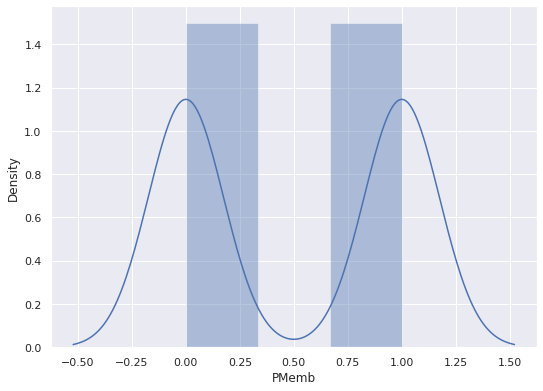

In [59]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [60]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

99

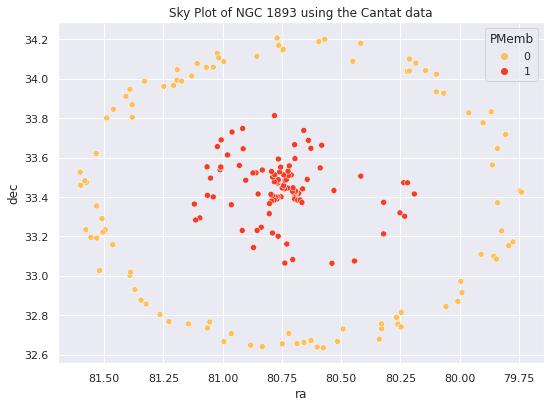

In [61]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'PMemb', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 1893 using the Cantat data')
plt.show()

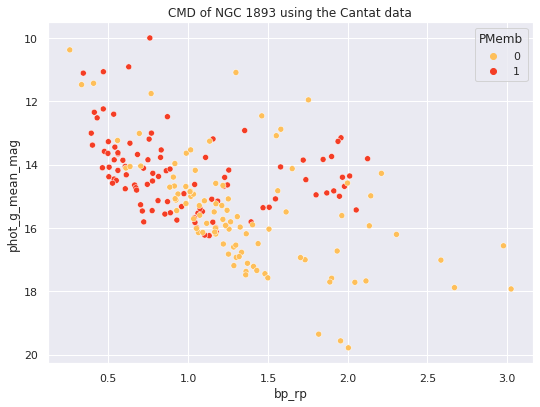

In [62]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
cmd.invert_yaxis()
plt.title('CMD of NGC 1893 using the Cantat data')
plt.show()

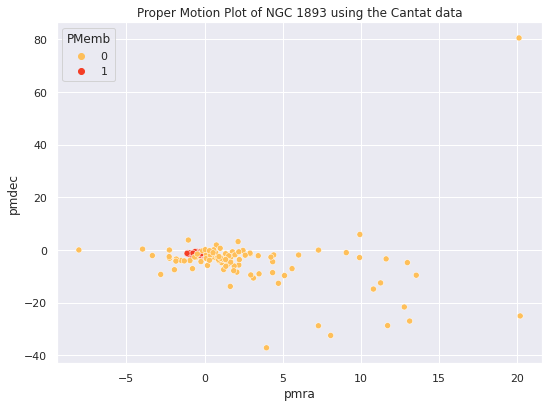

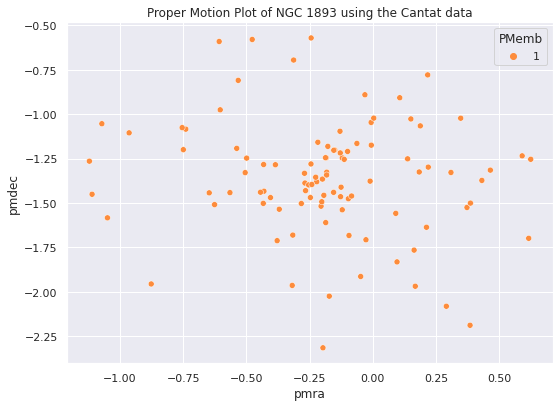

In [63]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 1893 using the Cantat data')
plt.show()
pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = member)
plt.title('Proper Motion Plot of NGC 1893 using the Cantat data')
plt.show()

In [65]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

parallax    0.337490
pmra        0.333262
pmdec       0.329248
dtype: float64

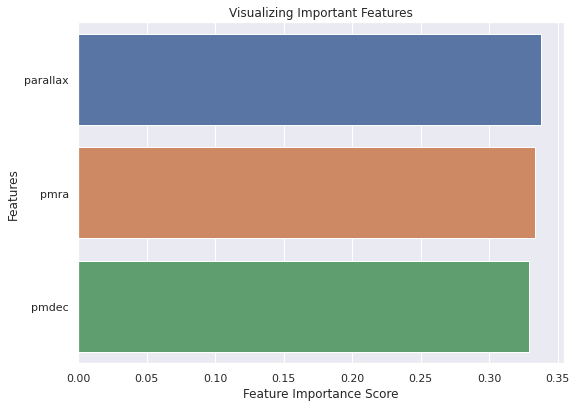

In [67]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [68]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [69]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [70]:
# train the model using only training subset
rfc.fit(train_features, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfc.predict(test_features)
rfc.score(test_features, test_targets)

0.9322033898305084

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

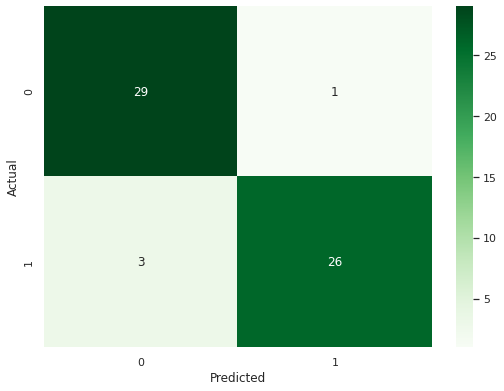

Accuracy Score: 0.93
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.96      0.90      0.93        29

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [78]:
sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('Accuracy Score: %.2f' % accuracy_score(test_targets, test_predict))
print("Classification Report: \n", classification_report(test_targets, test_predict))


In [79]:
# plot Predicted vs True Targets in Test Subset

#sns.scatterplot(test_predict, test_targets)
#plt.title('Predicted vs True Targets in Test Subset')
#plt.ylabel('True Targets')
#plt.xlabel('Predicted Targets')
#plt.show()

In [76]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [80]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfc.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfc.predict(test_features)
    accuracy += rfc.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.8824468085106382, 0.9143258426966293, 0.9321428571428572, 0.9436708860759497, 0.9503378378378379, 0.9565217391304348, 0.950390625, 0.954237288135593, 0.9569444444444445, 0.9560606060606058, 0.9601123595505617, 0.9632911392405064, 0.9623188405797103, 0.9618644067796607, 0.9581632653061224, 0.9589743589743591, 0.9586206896551724, 0.9526315789473683, 0.9555555555555555]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


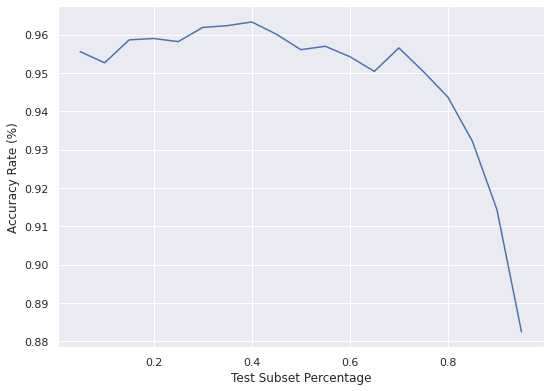

In [81]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [ ]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_1893_center
count,1.289600e+04,1.289600e+04,1.289600e+04,12896.0,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.0,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,...,12809.000000,12896.000000,1.281000e+04,1.281000e+04,12810.000000,12810.000000,12809.000000,12896.000000,12809.000000,12809.000000,12810.000000,562.000000,562.000000,12896.000000,562.000000,562.000000,562.000000,12896.000000,12896.000000,12896.000000,12896.000000,10259.000000,10259.000000,10259.000000,10259.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,7711.0,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,12896.000000,12896.000000
mean,1.635721e+18,1.816492e+17,8.438701e+08,2015.5,80.677634,0.084898,33.398834,0.068016,1.086155,0.093816,15.471703,1.970300,0.177446,-5.413192,0.126279,-0.167037,0.123158,-0.215219,0.238978,-0.338578,0.187007,-0.444379,0.109561,0.335833,-0.181647,153.004575,9.539935,152.127094,0.877481,1.121514,266.917603,0.118833,4.688660,31.0,33.429806,1.501730,0.018222,-0.087345,17.466811,10.296293,...,16.320560,15.598170,5.269385e+04,2.639897e+02,391.900757,14.952946,1.302585,0.059708,1.367851,0.613947,0.753984,3.381142,2.351044,0.219525,5316.547852,3.547153,-0.079626,173.591920,-1.690959,82.101730,10.215637,100026.988108,5025.689453,4847.401367,5293.424805,0.809914,0.585395,1.063773,0.400753,0.287964,0.527982,200111.0,2.404127,2.168493,2.585511,7.489456,6.209379,8.769514,0.598963,0.598941
std,0.000000e+00,7.428518e+14,4.865463e+08,0.0,0.536724,0.090045,0.448999,0.071648,1.196153,0.099246,18.631943,8.151945,0.196991,11.162698,0.138833,0.184513,0.153218,0.191862,0.193284,0.121486,0.146780,0.140948,0.169924,0.119545,0.204501,19.172903,36.941732,19.074184,1.424551,8.099106,2368.717529,0.354055,77.041911,0.0,70.371315,0.099299,0.018730,0.070645,2.139127,0.773387,...,1.869186,2.826942,8.600272e+05,1.416520e+04,286.103119,1.570492,0.132096,0.261535,0.497481,0.289360,0.224365,32.309941,2.851033,1.088967,679.330566,0.620506,0.333108,0.448178,0.449095,0.455402,0.448897,226.282491,748.906921,721.794250,793.097900,0.464434,0.425725,0.526926,0.231715,0.210090,0.265937,0.0,4.233188,3.774271,4.588603,39.621124,33.548237,45.841228,0.209499,0.209487
min,1.635721e+18,1.808286e+17,6.911600e+04,2015.5,79.585902,0.020815,32.494056,0.016609,0.161529,0.022131,5.000328,-80.417052,

In [ ]:
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)

In [ ]:
# select the set of predictor variables from the new dataset
new_features = all_stars_filtered.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [ ]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# estimate the membership probability of the stars
all_stars_filtered['PMemb'] = rfr.predict(new_features)
sum(all_stars_filtered['PMemb'] >= 0.5)

671

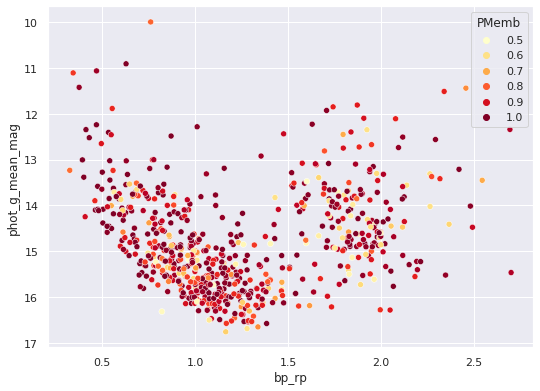

In [ ]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
cmd.invert_yaxis()

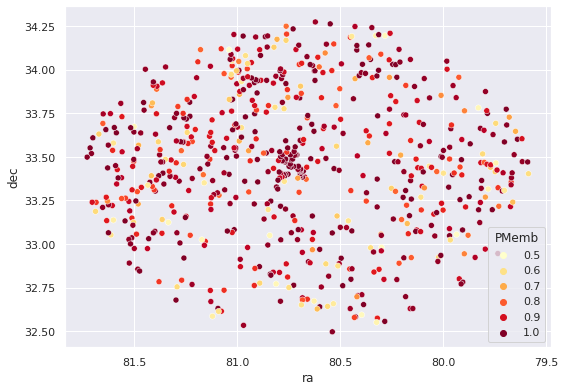

In [ ]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

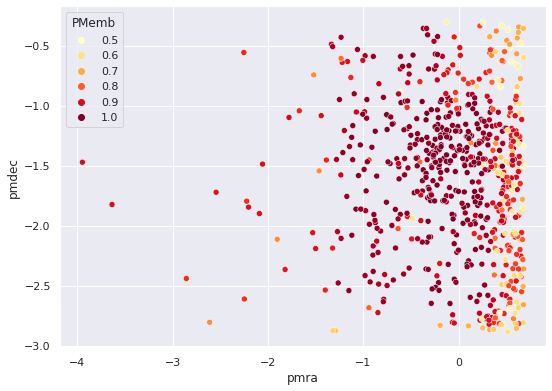

In [ ]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )

In [ ]:
potentialMember = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5]
len(potentialMember)

671

In [ ]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_1893_center,PMemb
count,6.710000e+02,6.710000e+02,6.710000e+02,671.0,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.0,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,...,671.000000,6.710000e+02,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,38.000000,38.000000,671.000000,38.000000,38.000000,38.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,671.000000,671.000000,671.000000
mean,1.635721e+18,1.817583e+17,8.622322e+08,2015.5,80.717242,0.041360,33.457508,0.033324,0.324535,0.045852,7.452922,-0.050739,0.082282,-1.596651,0.058038,-0.140321,0.142023,-0.240848,0.245776,-0.335274,0.186457,-0.464610,0.113934,0.327587,-0.106074,158.570790,8.062593,157.774963,0.795827,-0.188186,154.034409,0.017814,0.329622,31.0,43.089943,1.531062,0.009136,-0.075371,18.076006,10.511177,...,16.499255,3.516576e+04,66.429813,541.682983,14.121611,1.270575,0.050671,1.238079,0.552489,0.685590,-3.796093,2.096471,0.278689,5078.947266,3.394737,-0.078947,173.562190,-1.630558,82.139100,10.272028,100004.031297,5081.187500,4883.829102,5400.214844,1.347261,1.107353,1.724375,0.666296,0.544185,0.861789,200111.0,7.166615,6.305295,7.754675,34.905567,26.637321,43.173771,0.566788,0.566735,0.895291
std,0.000000e+00,7.454978e+14,4.953313e+08,0.0,0.537115,0.011365,0.407674,0.008935,0.057745,0.011839,2.123384,0.645373,0.023651,0.635514,0.017109,0.161672,0.118947,0.135880,0.144587,0.102962,0.127994,0.117529,0.121973,0.087486,0.161797,17.836086,33.219922,17.704499,1.359888,2.708085,61.437340,0.046523,1.327200,0.0,62.574688,0.090730,0.002550,0.063645,1.977154,0.632062,...,2.276338,7.450309e+04,169.193983,310.867798,1.095267,0.054280,0.219488,0.484920,0.279669,0.207145,27.464306,2.656103,1.208728,551.733276,0.534713,0.339442,0.415363,0.441260,0.456172,0.406933,77.207497,955.376282,908.092651,987.949158,0.405237,0.410001,0.457237,0.205004,0.204118,0.230599,0.0,6.874938,6.066598,7.414330,64.742302,49.417061,80.170288,0.228789,0.228768,0.129358
min,1.635721e+18,1.808295e+17,8.270400e+05,2015.5,79.585902,0.021950,32.495724,0.017396,0.161529,0.022973,5.014656,-3.946473,0.042718,-2.884257,0.030623,-0.756741,-0.277021,-0.683510,-0.178851,-0.638753,-0.211288,-0.792226,-0.571098,0.014066,-0.735982,88.000000,0.000000,87.0000

In [ ]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_1893_center
count,9.900000e+01,9.900000e+01,9.900000e+01,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,2.000000,2.000000,99.000000,2.000000,2.000000,2.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,99.000000,99.0,99.000000
mean,1.635721e+18,1.814353e+17,9.075314e+08,2015.5,80.747500,0.041009,33.443558,0.033017,0.305433,0.045916,6.859564,-0.188615,0.078698,-1.361384,0.055612,-0.178605,0.164131,-0.252330,0.272117,-0.377863,0.171102,-0.511712,0.155069,0.337855,-0.085752,148.959596,14.121212,148.181818,0.777778,-0.092885,147.444580,0.011407,0.218452,31.0,64.366661,1.575603,0.008952,-0.097976,16.909091,10.303030,...,15.444444,5.715839e+04,140.445390,518.559692,13.713282,1.255542,0.060606,1.000219,0.418706,0.581513,18.699157,0.960644,0.080808,5750.000000,4.000000,0.0,173.588825,-1.618222,82.163728,10.255735,100021.262626,5715.146484,5501.210938,6110.693359,1.306397,1.058595,1.661015,0.650430,0.523787,0.832880,200111.0,7.435204,6.378483,8.135204,72.355545,54.608341,90.102745,0.202992,1.0,0.202966
std,0.000000e+00,6.053841e+14,5.240856e+08,0.0,0.194423,0.011133,0.149213,0.008420,0.052536,0.010143,1.501217,0.369778,0.020132,0.324076,0.014273,0.204680,0.125329,0.147170,0.161773,0.096562,0.151524,0.117939,0.119745,0.102719,0.190105,19.880726,41.395621,19.697386,1.191428,3.065744,69.150291,0.034628,0.871172,0.0,76.476768,0.092966,0.002125,0.077592,2.213552,0.734771,...,2.843619,1.397741e+05,381.853021,478.822906,1.149414,0.050021,0.239821,0.483202,0.268190,0.217620,29.091288,0.217557,0.633693,353.553406,0.707107,0.0,0.140135,0.170210,0.166565,0.147400,201.001553,1182.209351,1145.896973,1190.838257,0.372275,0.363229,0.425162,0.185375,0.175645,0.220638,0.0,5.044431,4.305860,5.516739,129.711990,98.694420,160.921814,0.123273,0.0,0.123247
min,1.635721e+18,1.809519e+17,6.862069e+06,2015.5,80.190774,0.025518,33.063148,0.020848,0.205932,0.027534,5.014656,-1.120928,0.049882,-2.314877,0.035424,-0.756741,-0.100532,-0.656294,-0.131934,-0.638753,-0.169092,-0.772315,-0.130885,0.014066,-0.571239,88.000000,0.000000,87.000000,0.000000,-5.626834,65.433289,0.000000,0.000000,31.0,6.368932,1.351176,0.005114,-0.317101,10.0000

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


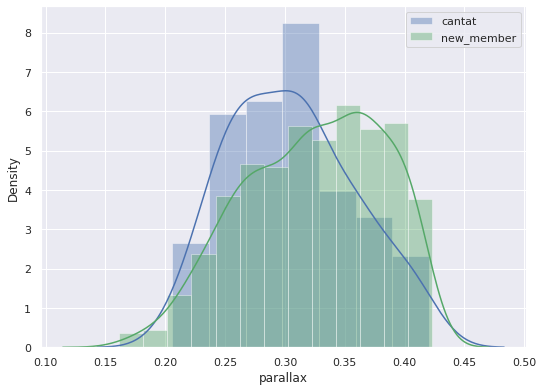

In [ ]:
sns.distplot(member['parallax'], color = 'b', label = 'cantat', kde=True)
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', kde=True)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


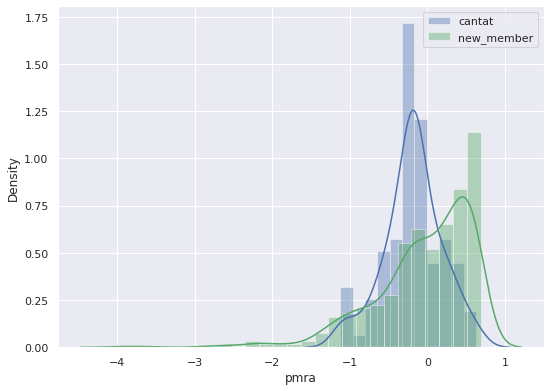

In [ ]:
sns.distplot(member['pmra'], color = 'b', label = 'cantat')
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


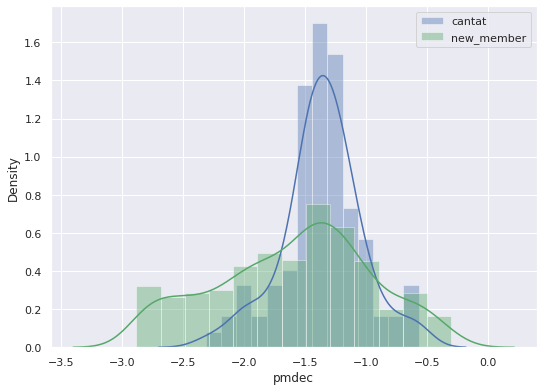

In [ ]:
sns.distplot(member['pmdec'], color = 'b', label = 'cantat')
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member')
plt.legend()
plt.show()

In [ ]:
# saving the files as csv
# all_stars.to_csv('gaia_1893_membership_prob.csv')

potentialMember.to_csv('NGC_1893_membership_prob.csv')


### Comparing the new and old probable members

In [ ]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [ ]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_1893_center,PMemb,dataset
28,1635721458409799680,Gaia DR2 181173441514942336,181173441514942336,1354923743,2015.5,80.672936,0.044613,33.384418,0.032364,0.279009,0.041563,6.712915,-0.186406,0.081357,-1.609973,0.051406,-0.539708,0.024442,-0.562214,0.589747,-0.240073,0.459728,-0.644438,0.363260,0.183228,-0.422729,142,0,142,0,0.747658,149.046036,0.000000,0.000000,31,False,44.469986,1.637182,0.008829,-0.182636,...,13.782348,1.232768,0,0.778579,0.287061,0.491518,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.602548,-1.703050,82.096723,10.200671,100001,5861.000000,5652.966797,6197.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.011418,0.011427,0.95,New_member
69,1635721458409799680,Gaia DR2 181173402856344704,181173402856344704,1083987017,2015.5,80.665346,0.051863,33.371732,0.039550,0.355671,0.056363,6.310420,-0.404865,0.098256,-1.469104,0.064421,-0.340774,0.121734,-0.408987,0.434991,-0.309844,0.276899,-0.544547,0.357247,0.247405,-0.218139,150,150,150,0,4.962319,246.035080,0.000000,0.000000,31,False,285.341278,1.621134,0.010479,-0.142878,...,9.540352,1.203930,0,0.760005,0.302708,0.457297,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.609423,-1.715455,82.089452,10.188427,100001,5953.000000,5883.000000,6154.109863,NaN,NaN,NaN,NaN,NaN,NaN,200111,22.728323,21.267118,23.272415,584.484497,460.900482,708.068481,https://gea.esac.esa.int/data-server/datalink/...,,0.018358,0.018365,0.79,New_member
82,1635721458409799680,Gaia DR2 181173540295297152,181173540295297152,19363156,2015.5,80.683395,0.042702,33.383687,0.029753,0.221355,0.041037,5.394092,-0.121100,0.077915,-1.538002,0.048452,-0.534487,0.092364,-0.534014,0.608454,-0.176262,0.470998,-0.654111,0.418130,0.189785,-0.426529,127,0,126,1,-0.324164,115.379860,0.000000,0.000000,31,False,96.434502,1.671193,0.008347,-0.157306,...,13.083505,1.216637,0,0.540833,0.178650,0.362184,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.608095,-1.696263,82.105529,10.199369,100001,6986.992676,6715.767090,7346.000000,1.3080,0.9975,1.5966,0.6340,0.4979,0.789,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.019793,0.019802,1.00,New_member
133,1635721458409799680,Gaia DR2 181173544594151424,181173544594151424,708372502,2015.5,80.691077,0.049273,33.388175,0.039592,0.336855,0.054941,6.131197,-0.204878,0.089778,-1.517593,0.062607,-0.276054,0.191169,-0.300199,0.437140,-0.399575,0.261741,-0.449289,0.282922,0.297939,-0.112558,140,122,138,2,6.682558,273.391785,0.000000,0.000000,31,True,237.863861,1.683091,0.012412,-0.105379,...,12.230424,1.203018,0,0.429568,0.137908,0.291660,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.608023,-1.688435,82.112330,10.203429,100001,7757.000000,7431.279785,8459.333008,1.1892,0.9895,1.4111,0.5980,0.4663,0.706,200111

In [ ]:
concatenated.dataset.value_counts()

New_member    671
Old_member     99
Name: dataset, dtype: int64

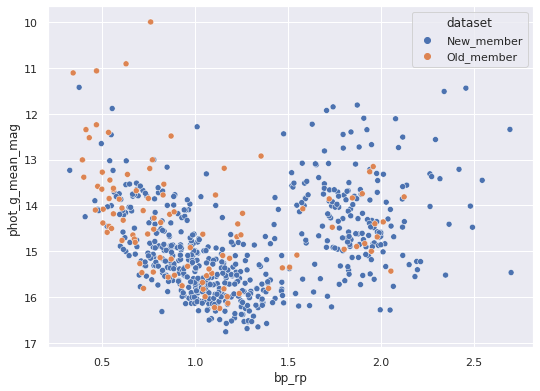

In [ ]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

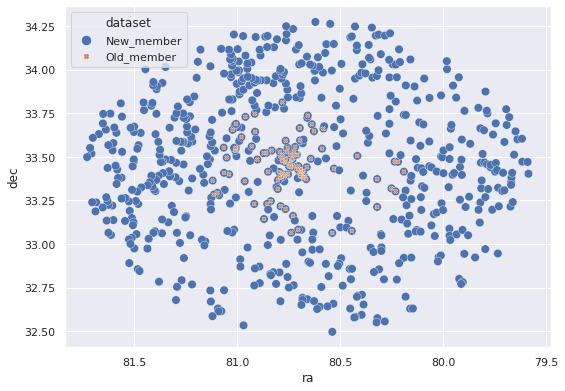

In [ ]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='dataset', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

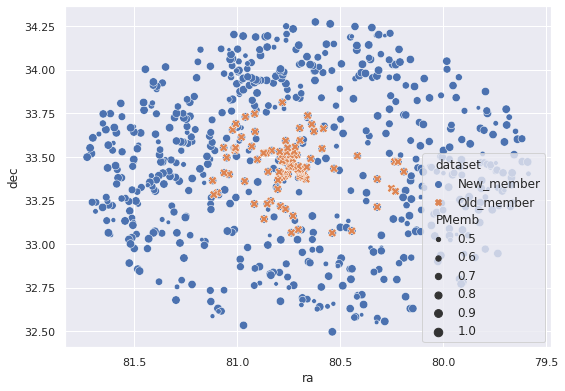

In [ ]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

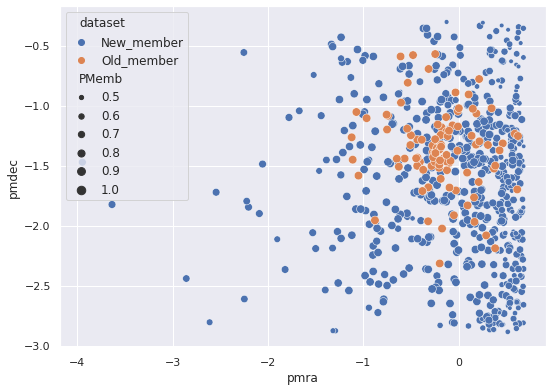

In [ ]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [ ]:
# pd_prof.ProfileReport(potentialMember)

In [ ]:
#files.download('NGC_1893_cantat.csv')

files.download('NGC_1893_membership_prob.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


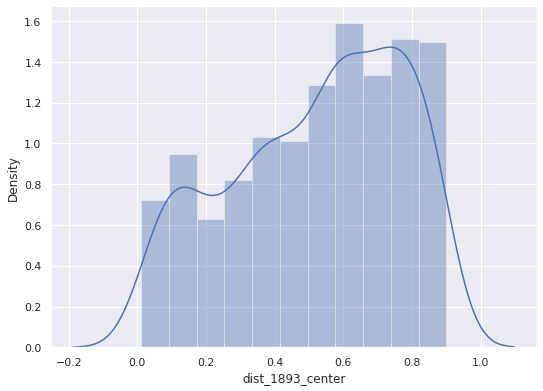

In [ ]:
sns.distplot(concatenated['dist_1893_center'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


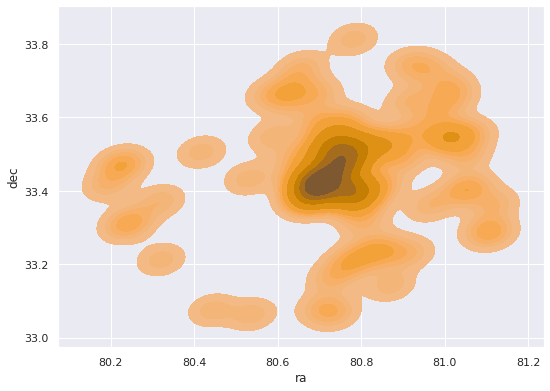

In [ ]:
sns.kdeplot('ra', 'dec', data = member, shade=True, color = 'orange', bw = 0.20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


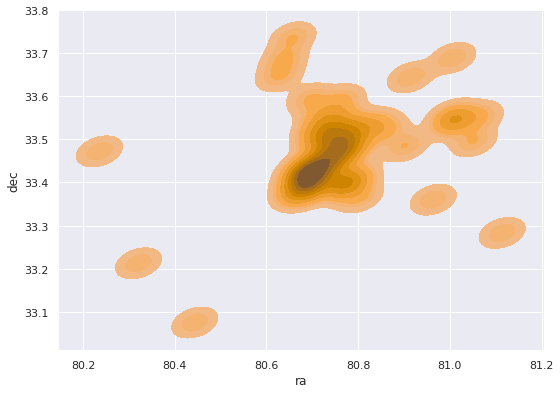

In [ ]:
sns.kdeplot('ra', 'dec', data = cantat_1893[cantat_1893['PMemb'] >= 0.5], shade=True, color = 'orange', bw = 0.20)

In [ ]:
len(cantat_1893[cantat_1893['PMemb'] >= 0.5])

61

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


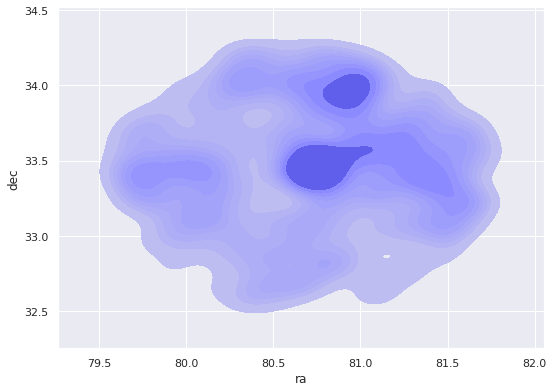

In [ ]:
sns.kdeplot('ra', 'dec', data = potentialMember, shade=True, color = 'blue', bw = 0.20)

In [ ]:
potentialMember['radial_velocity'].dropna()

11773     42.940018
12881    -24.975249
16484     46.978027
19438     39.269804
20426     -1.871490
20845    -23.006755
21362    -25.710734
22027     21.370130
26610      3.831324
27034     -9.470344
28773    -14.149599
29867     34.579026
35536      1.407608
38991    -20.655428
44294    -22.719427
47780     15.322275
48310    -26.708278
50390     13.133257
51602    -46.252230
53441    -24.886722
53677     40.256882
56881     12.164682
58123     -6.505322
62330      9.636079
62977    -10.145730
64398    -16.501090
66181    -40.546744
69393    -35.081845
71418    -14.748536
74004     17.614496
75360    -54.790364
75742    -47.965925
90551     -5.022355
90725      7.160913
97004     42.519224
99848     18.766873
103022    -8.249196
105531   -31.238786
Name: radial_velocity, dtype: float64

In [ ]:
member['radial_velocity'].dropna()

19438    39.269804
20426    -1.871490
Name: radial_velocity, dtype: float64

In [ ]:
member['radial_velocity_error'].dropna()

19438    1.114480
20426    0.806808
Name: radial_velocity_error, dtype: float64